# ¿Que es la covarianza?

La covarianza es el valor que refleja en qué cuantía dos variables aleatorias varían de forma conjunta respecto a sus medias

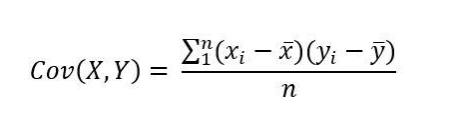

In [ ]:
from numpy import array
import numpy as np
from numpy import cov
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot  as plt
x = array([1,2,3,4,5,6,7,8,9])
print(x)
y = array([9,8,7,6,5,4,3,2,1])
print(y)
Sigma = cov(x,y)
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
[[ 7.5 -7.5]
 [-7.5  7.5]]


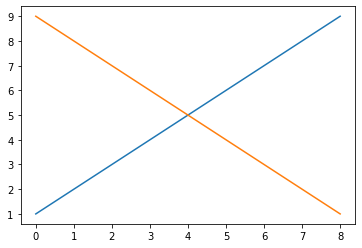

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.plot(y)

In [ ]:
Sigma[0][1]

-7.5

# ¿Que es la correlación?

Es una medida estadística que nos permite cuantificar el grado de similutd entre dos variables. Se diferencia de la covarianza en que esta normalizda


In [ ]:
s_normalizada = np.corrcoef(x,y)

In [ ]:
s_normalizada

array([[ 1., -1.],
       [-1.,  1.]])

In [ ]:
s_normalizada[0][1]

-1.0

In [ ]:
df = pd.DataFrame({'col1':x,'col2':y})
df.head(10)

,col1,col2
0,1,9
1,2,8
2,3,7
3,4,6
4,5,5
5,6,4
6,7,3
7,8,2
8,9,1


In [ ]:
df.corr(method='pearson')

,col1,col2
col1,1.0,-1.0
col2,-1.0,1.0


# Correlación entre Empresas. Coeficiente de Perason

# ¿Que es el Coeficiente de Pearson?

Es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.

# Interpretación

* Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
* Si 0 < r < 1, existe una correlación positiva.
* Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables



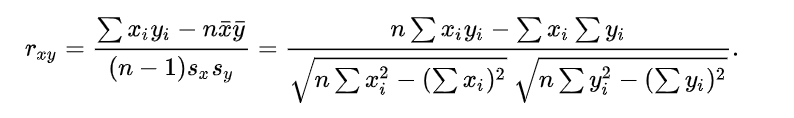

# Correlación entre Empresas.

In [45]:
tickers = ["AAPL", "MSFT" ,"AMZN", "GOOGL", "META","TSLA", "V" ]
df1 = pd.DataFrame()

for ticker in tickers:
    df1[ticker] = yf.Ticker(ticker).history(start="2016-04-20", end="2021-01-01").Close

In [46]:
df1

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,V
Date,,,,,,,
2016-04-20 00:00:00-04:00,24.580353,49.962177,31.649500,38.745998,112.419998,16.664667,77.238792
2016-04-21 00:00:00-04:00,24.314194,50.132935,31.549999,39.000000,113.440002,16.552668,76.896187
2016-04-22 00:00:00-04:00,24.247662,46.537884,31.025000,36.888500,110.559998,16.916668,75.297150
2016-04-25 00:00:00-04:00,24.109997,46.834476,31.309999,37.110500,110.099998,16.788000,74.373871
2016-04-26 00:00:00-04:00,23.942493,46.232315,30.844000,36.268501,108.760002,16.916000,74.745079
...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,130.025925,217.824768,158.634506,86.708000,267.399994,220.589996,205.066315
2020-12-28 00:00:00-05:00,134.676392,219.985886,164.197998,88.697998,277.000000,221.229996,208.927902
2020-12-29 00:00:00-05:00,132.883179,219.193802,166.100006,87.888000,276.779999,221.996674,210.637604


In [47]:
df1.corr()

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,V
AAPL,1.000000,0.955007,0.946321,0.937998,0.929146,0.892220,0.870674
MSFT,0.955007,1.000000,0.965775,0.951499,0.900054,0.761582,0.961299
AMZN,0.946321,0.965775,1.000000,0.944620,0.908166,0.787547,0.920464
GOOGL,0.937998,0.951499,0.944620,1.000000,0.939062,0.758671,0.939252
META,0.929146,0.900054,0.908166,0.939062,1.000000,0.796388,0.860205
TSLA,0.892220,0.761582,0.787547,0.758671,0.796388,1.000000,0.610590
V,0.870674,0.961299,0.920464,0.939252,0.860205,0.610590,1.000000


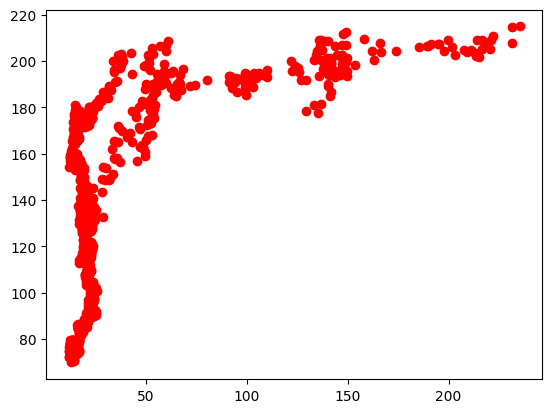

In [48]:
plt.plot(df1['TSLA'],df1['V'],'ro')

<Axes: >

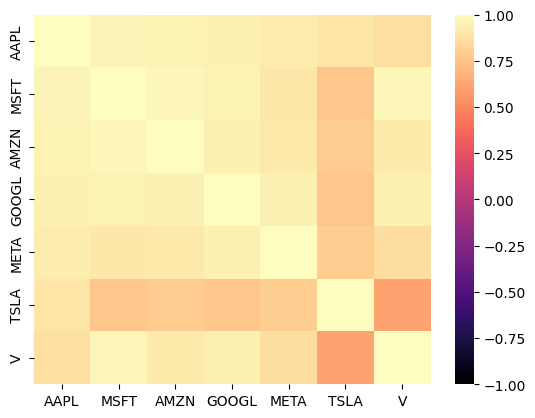

In [56]:
import seaborn as sb
sb.heatmap(df1.corr(),cmap='magma',vmax=1,vmin=-1,xticklabels=1,yticklabels=1)

# Estudio de las distrbuciones

# ¿Que es una distrbucion Normal o Gaussiana?

Nos permite describir el comportamiento de una variable aleatoria. Se compone de dos parametros principales
Media y desviación típica

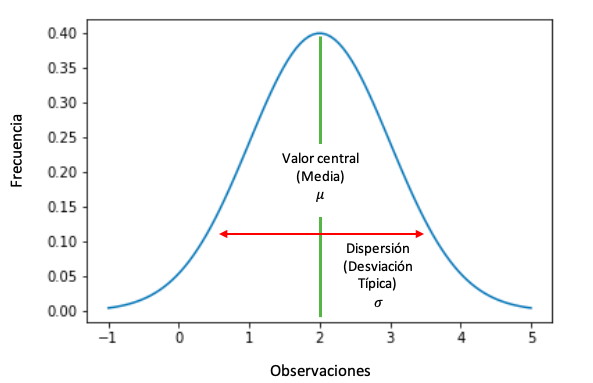

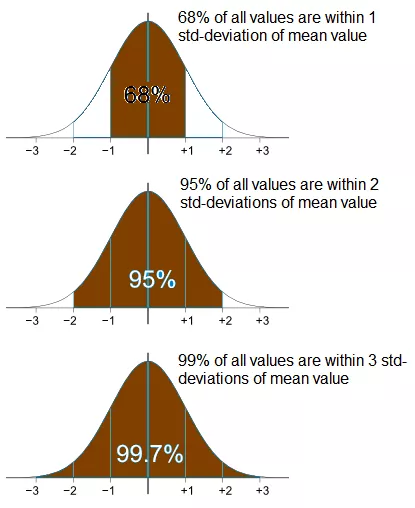

In [52]:
import seaborn as sb

<Axes: xlabel='V', ylabel='Count'>

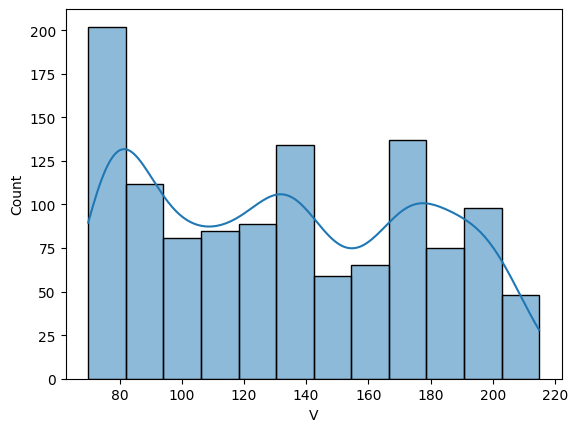

In [57]:
sb.histplot(df1["V"], kde=True)

<Axes: ylabel='Count'>

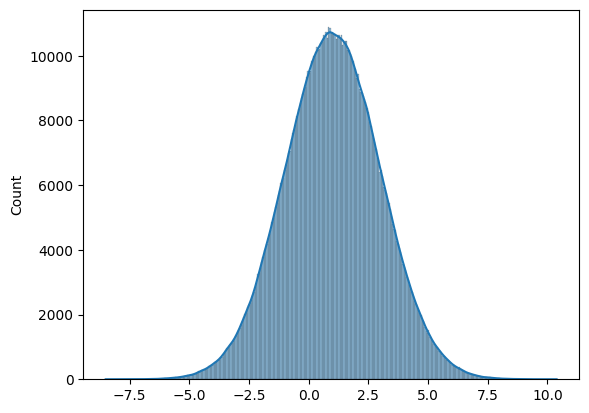

In [58]:
mu, sigma = 1, 2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000000)
sb.histplot(data=datos,kde=True)

<Axes: xlabel='V', ylabel='Count'>

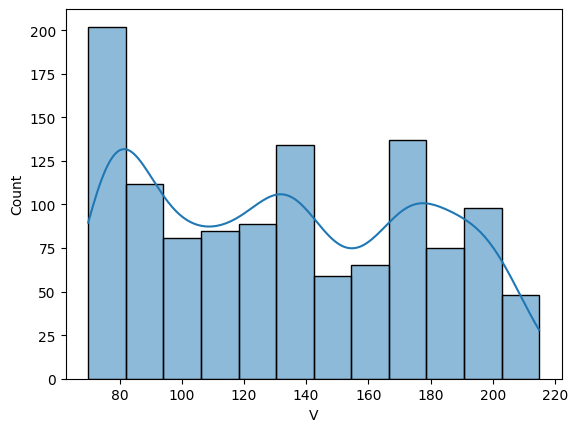

In [61]:
sb.histplot(data=df1,x=df1['V'],kde=True)

# Curtorsis y Asimetría

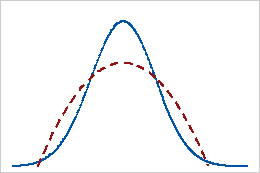

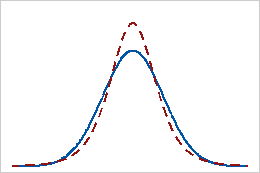

La curtosis es una medida estadística que determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de la distribución de frecuencias


Si este coeficiente es nulo, la distribución se dice normal (similar a la distribución normal de Gauss) y recibe el nombre de mesocúrtica.

Si el coeficiente es positivo, la distribución se llama leptocúrtica, más puntiaguda que la anterior. Hay una mayor concentración de los datos en torno a la media.

Si el coeficiente es negativo, la distribución se llama platicúrtica y hay una menor concentración de datos en torno a la media. sería más achatada que la primera.

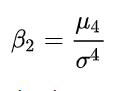

In [62]:
from scipy.stats import kurtosis
kurtosis(df1['MSFT'])

-0.6030184580825808

In [ ]:
kurtosis(datos)

0.005640915526519574

# Asimetría

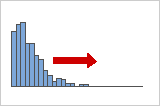

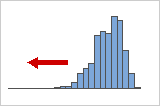

# Coeficiente de Asimetría de Fischer


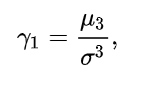

Si y1 >0, la distribución es asimétrica positiva o a la derecha.

Si y1 < 0, la distribución es asimétrica negativa o a la izquierda

In [ ]:
df1['AMZN'].skew()
df1['TSLA'].skew()

0.7418352137577073